In [1]:
"""week1 """

'week1 '

In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### <font color ="tomato">Average (Mean)</font>

In [9]:
values = make_array(2,3,3,9)

In [10]:
sum(values) / len(values)

4.25

In [11]:
np.average(values), np.mean(values)

(4.25, 4.25)

##### distribution : we can't know original data from average

In [12]:
2 * (1/4) + 3 * (2/4) + 9 * (1/4)

4.25

In [69]:
# values_table is another table object created by Table() 
values_table = Table().with_columns('Value', values)
values_table

Value
2
3
3
9


In [23]:
bins_for_display = np.arange(0.5, 10.6, 1)
bins_for_display #np.arange(start, stop, step). it's similar with range

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5])

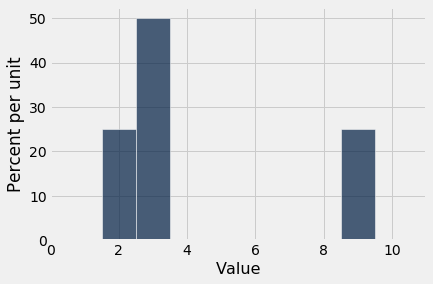

In [19]:
values_table.hist(bins = bins_for_display, ec = 'w')

In [24]:
ones=np.ones(10)

In [25]:
2*ones

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [26]:
twos = 2*ones
threes = 3*ones
nines = 9*ones

### <font color="tomato">Average & Median </font>

In [27]:
nba = Table().read_table('nba2013.csv')

In [28]:
nba

Name,Position,Height,Weight,Age in 2013,Unnamed: 5
DeQuan Jones,Guard,80,221,23,nan
Darius Miller,Guard,80,235,23,nan
Trevor Ariza,Guard,80,210,28,nan
James Jones,Guard,80,215,32,nan
Wesley Johnson,Guard,79,215,26,nan
Klay Thompson,Guard,79,205,23,nan
Thabo Sefolosha,Guard,79,215,29,nan
Chase Budinger,Guard,79,218,25,nan
Kevin Martin,Guard,79,185,30,nan
Evan Fournier,Guard,79,206,20,nan


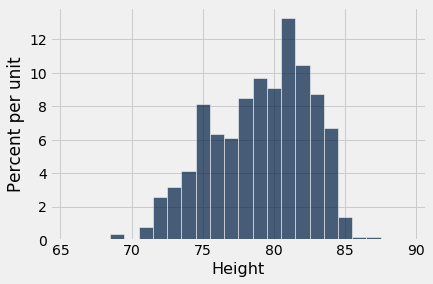

In [36]:
nba.hist('Height', bins=np.arange(65.5,90.5), ec='w')
#the range(범위) of arange is between the smallest and the biggest

In [31]:
heights = nba.column('Height')
percentile(50, heights), np.average(heights)

(80, 79.06534653465347)

### <font color="tomato">Standard Deviation</font>

In [38]:
standard_table = Table().with_columns('Value', values)
standard_table

Value
2
3
3
9


In [39]:
average = np.average(values)
average

4.25

In [40]:
deviations = values - average
standard_table = standard_table.with_column('Deviation', deviations)
standard_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [42]:
sum(deviations)

0.0

In [45]:
standard_table = standard_table.with_column('Squared Deviation', deviations**2)
standard_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [46]:
# variance of the data is the average of the squared deviations

variance = np.average(standard_table.column('Squared Deviation'))
variance

7.6875

In [47]:
# Standard Deviation (SD) is the square root(제곱근) of the variance

sd = variance ** 0.5 
sd

2.7726341266023544

### steps for calculating 'Standard Deviation' is...

SD = root mean square of deviations from average <br>
(Steps: 5  4    3         2                1)

1. 평균을 구하고
2. 편차를 구한 후
3. 편차를 제곱하고
4. 평균을 낸 뒤, 
5. 다시 루트를 씌운다.


### why Use the SD?

<b>1. the bulk of the data are in the range "average +- a few SDs"</b>
<br>We can't find original data from histogram with only average. 
<br>So, we need to know the SD.
<br><br>
<b>2. Relation with bell shaped curves (정규분포와의 관련)</b>

### <font color="tomato"> Chebyshev's Bounds </font> 

"average += z SDs" is at least 1- (1/z\*z) <br>
the bigger z is, the more precise the data is <br><br>
average +- 5 SDs | 1- (1/5\*5) = 96% </example>

**hello world** 

In [55]:
births = Table().read_table('baby.csv')
births

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


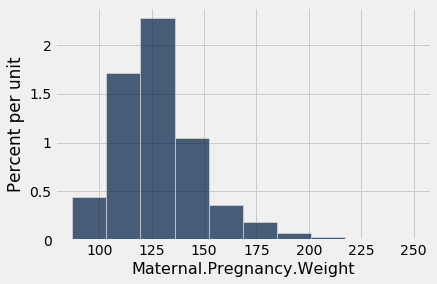

In [57]:
births.hist('Maternal.Pregnancy.Weight')

In [58]:
mpw = births.column('Maternal.Pregnancy.Weight')
average= np.average(mpw)
sd = np.std(mpw)
average, sd

(128.4787052810903, 20.72544970428041)

In [59]:
within_3_SDs = births.where('Maternal.Pregnancy.Weight', are.between(average-3*sd, average +3*sd))

In [60]:
within_3_SDs.num_rows / births.num_rows

0.9863713798977853

#### Chevyshev's bound for the proportion in the range "average plus of minus 3 SDs" 

is at least 

1- 1/3\*\*2

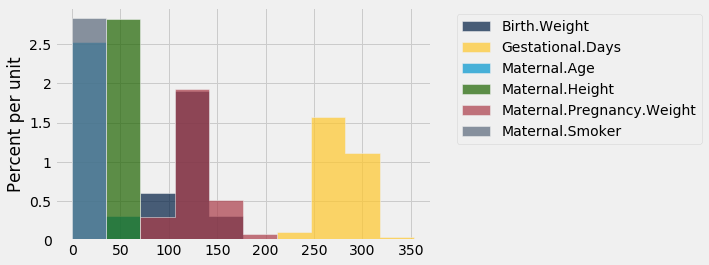

In [63]:
births.hist(overlay=True) # True 로 하면 겹쳐서 나온다. 

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

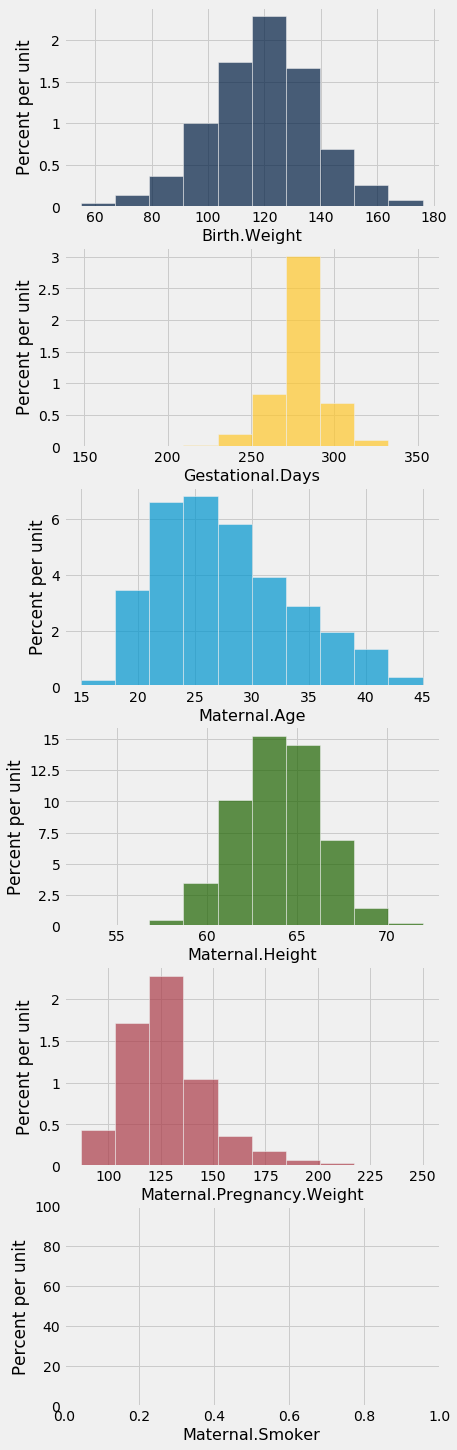

In [65]:
births.hist(overlay=False) 

In [67]:
# See if Chebyshev's bounds work
# for different shapes of distributions

births.labels

('Birth.Weight',
 'Gestational.Days',
 'Maternal.Age',
 'Maternal.Height',
 'Maternal.Pregnancy.Weight',
 'Maternal.Smoker')

In [70]:
for k in births.labels : 
    values = births.column(k)
    average = np.average(values)
    sd = np.std(values) 
    print()
    print(k)
    
    for z in np.arange(2, 6) : 
        chosen = births.where(k, are.between(average - z*sd, average + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus :', z, '\nSDs :', percent, '%')


Birth.Weight
Average plus or minus : 2 
SDs : 94.89 %
Average plus or minus : 3 
SDs : 99.57 %
Average plus or minus : 4 
SDs : 100.0 %
Average plus or minus : 5 
SDs : 100.0 %

Gestational.Days
Average plus or minus : 2 
SDs : 93.78 %
Average plus or minus : 3 
SDs : 98.64 %
Average plus or minus : 4 
SDs : 99.57 %
Average plus or minus : 5 
SDs : 99.83 %

Maternal.Age
Average plus or minus : 2 
SDs : 94.89 %
Average plus or minus : 3 
SDs : 99.91 %
Average plus or minus : 4 
SDs : 100.0 %
Average plus or minus : 5 
SDs : 100.0 %

Maternal.Height
Average plus or minus : 2 
SDs : 97.19 %
Average plus or minus : 3 
SDs : 99.66 %
Average plus or minus : 4 
SDs : 99.91 %
Average plus or minus : 5 
SDs : 100.0 %

Maternal.Pregnancy.Weight
Average plus or minus : 2 
SDs : 95.06 %
Average plus or minus : 3 
SDs : 98.64 %
Average plus or minus : 4 
SDs : 99.49 %
Average plus or minus : 5 
SDs : 99.91 %

Maternal.Smoker
Average plus or minus : 2 
SDs : 100.0 %
Average plus or minus : 3 
SDs :

### <font color ="blue"> Reading and Practice of Section 1 </font>

In [72]:
arr = [0, 10, 20, 30, 40, 50]

In [82]:
10*500 + 10 * 250 + 20 * 150  + 30 * 50 + 40 * 15 + 50 * 5 

12850

In [83]:
12850 / 970 

13.24742268041237

In [80]:
10 * 10 + 20 * 50 + 25 * 90 + 40 * 220 + 50* 600 

42150

In [81]:
42150 / 970

43.45360824742268